# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/clean_resume_data.csv')
data.head()

,ID,Category,Feature
0,16852973,HR,hr administrator marketing associate hr admini...
1,22323967,HR,hr specialist hr operations summary media prof...
2,33176873,HR,hr director summary years experience recruitin...
3,27018550,HR,hr specialist summary dedicated driven dynamic...
4,17812897,HR,hr manager skill highlights hr skills hr depar...


In [3]:
data['Category'].value_counts()

,count
Category,
INFORMATION-TECHNOLOGY,120
BUSINESS-DEVELOPMENT,120
FINANCE,118
ADVOCATE,118
ACCOUNTANT,118
ENGINEERING,118
CHEF,118
AVIATION,117
FITNESS,117


In [4]:
data['Category'].unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

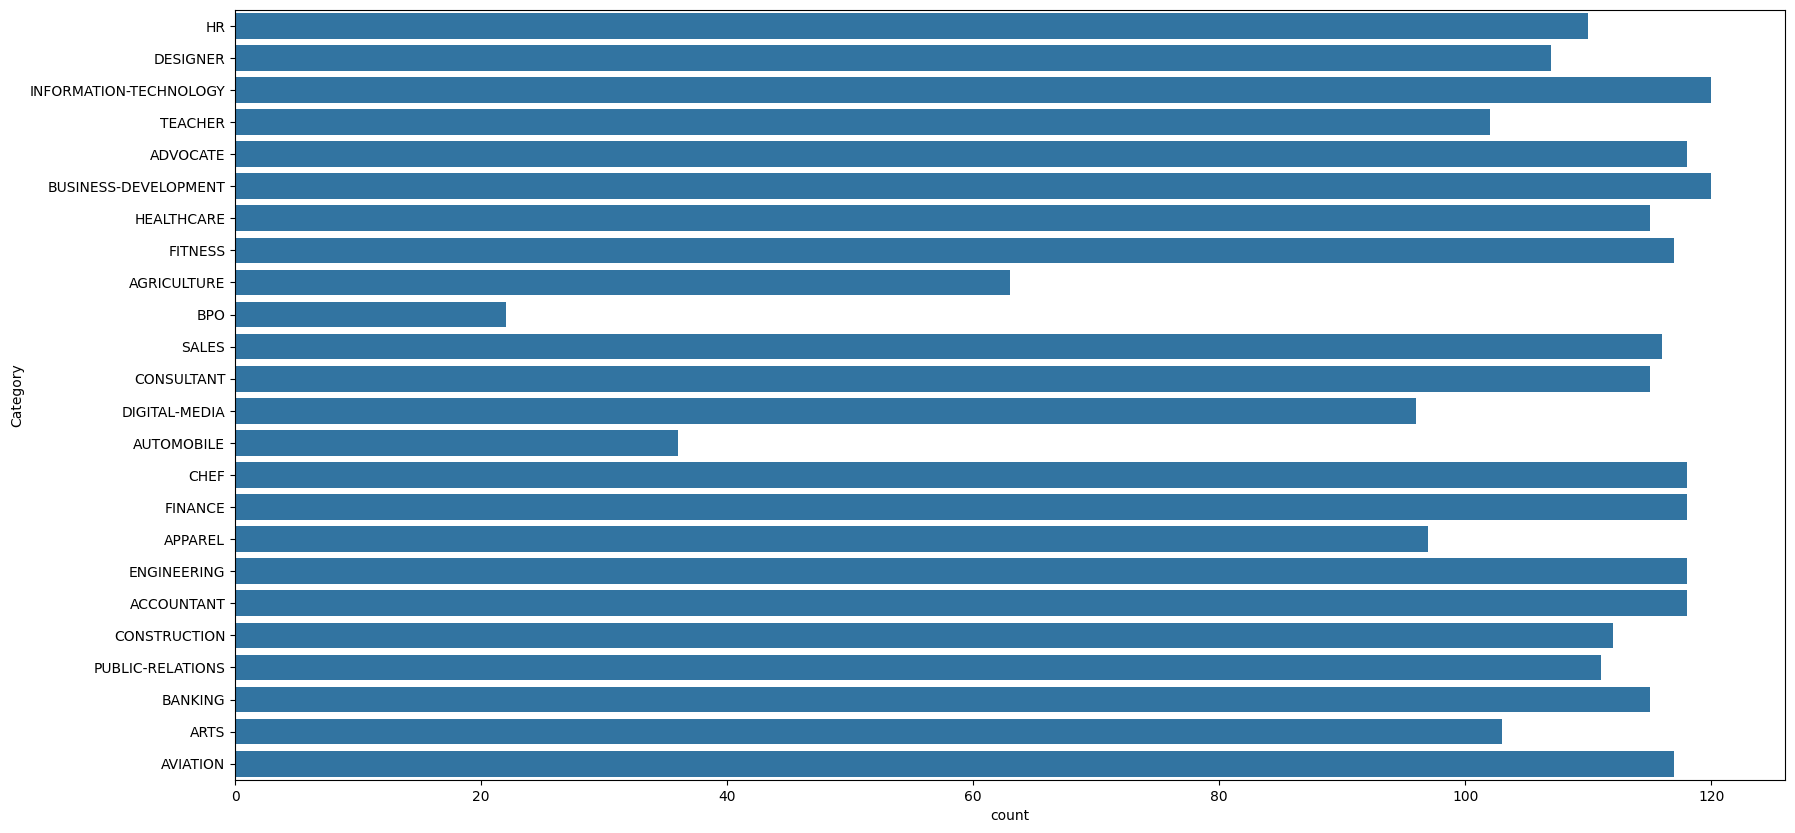

In [5]:
plt.figure(figsize=(20,10))
sns.countplot(data['Category'])
plt.show()

In [6]:
data.head()

,ID,Category,Feature
0,16852973,HR,hr administrator marketing associate hr admini...
1,22323967,HR,hr specialist hr operations summary media prof...
2,33176873,HR,hr director summary years experience recruitin...
3,27018550,HR,hr specialist summary dedicated driven dynamic...
4,17812897,HR,hr manager skill highlights hr skills hr depar...


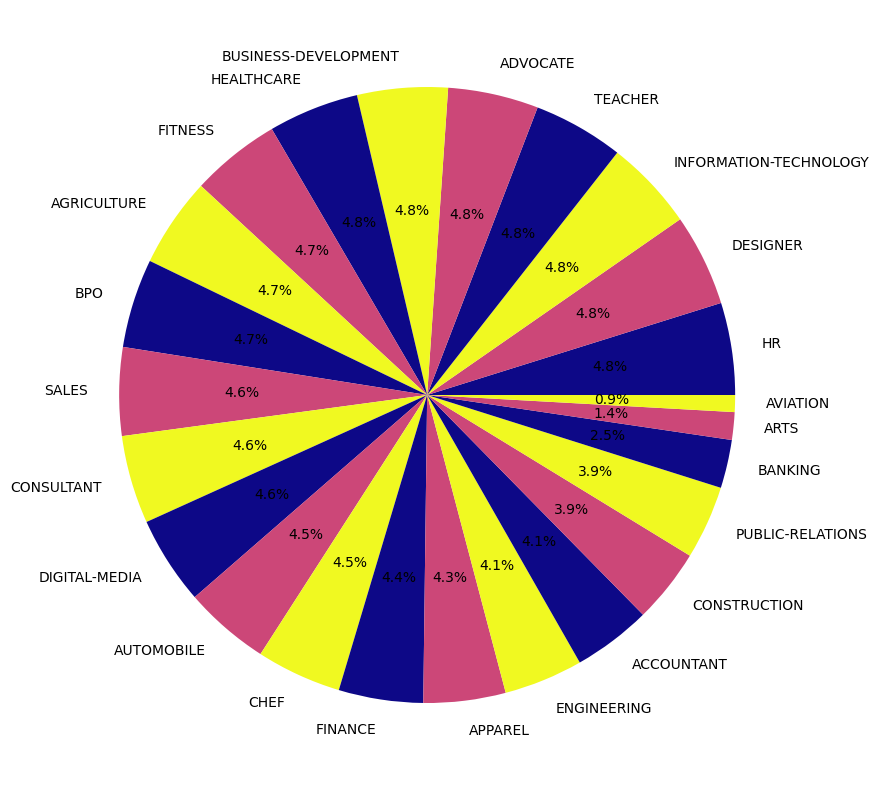

In [7]:
counts = data['Category'].value_counts()
labels = data['Category'].unique()
plt.figure(figsize=(10,10))

plt.pie(counts,labels=labels,autopct='%1.1f%%', colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

In [8]:
data['Category'][10]

'HR'

In [9]:
data['Feature'][10]

'hr assistant summary highly motivated dynamic human resources professional diverse credentials seeking position growing organization make positive impact company policies experience career growth accomplished human resources administrative professional years experience attentive detail able take initiative prioritize multiple tasks manage workload resourceful team player attitude results driven strong communication analytical interpersonal skills maintain utmost confidentiality highlights compensation knowledge ms office suite ar ap proficiency oracle knowledge great communication skills great analytical skills new hire training filing records management spreadsheets reports office management customer service quickbooks peachtree new hire paperwork experience current company name city state sourced recruited call center departments company responsible finding right candidates matching temporary permanent job placement company maintaining computer system updating entering data brassrin

In [10]:
# Check for missing values
data.isnull().sum()

,0
ID,0
Category,0
Feature,1


In [11]:
data = data.dropna()

In [12]:
data.duplicated().sum()

0

In [13]:
data = data.drop_duplicates()

# Cleaning Data

In [14]:
def clean_text(text):
  # Convert to lowercase
  text = text.lower()
  # Remove special characters and punctuation
  text = re.sub(r'[^\w\s]', '', text)
  # Remove numbers
  text = re.sub(r'\d+', '', text)
  # Remove extra whitespace
  text = re.sub(r'\s+', ' ', text).strip()
  #Remove Urls
  text = re.sub(r'http\S+|www\S+', '', text)
  # Remove hashtags
  text = re.sub(r'#\w+', '', text)
  # Remove mentions
  text = re.sub(r'@\w+', '', text)
  return text

In [15]:
data['Feature'] = data['Feature'].apply(lambda x: clean_text(x))

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [17]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [18]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
  words = text.split()
  filtered_words = [word for word in words if word not in stop_words]
  lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
  return ' '.join(lemmatized_words)

In [19]:
data['Feature'] = data['Feature'].apply(preprocess_text)

In [20]:
# Initialize and fit TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['Feature'])

In [21]:
from sklearn.metrics.pairwise import cosine_similarity

# Job Descriptions

In [22]:
Job_Description_HR = "We are seeking a motivated and detail-oriented HR Generalist with 3 years of experience in the IT industry to join our team. The ideal candidate will have a strong understanding of HR best practices, excellent communication skills, and a passion for fostering a positive and productive work environment. Responsibilities: Recruitment and Onboarding: Manage full-cycle recruitment process, including sourcing candidates, conducting interviews, and extending offers. Coordinate onboarding activities for new hires. Employee Relations: Provide support and guidance to employees on HR-related matters. Address employee concerns and resolve conflicts in a timely and professional manner. Performance Management: Assist in the development and implementation of performance management processes. Track employee performance and facilitate performance reviews. HR Administration: Maintain accurate employee records and ensure compliance with HR policies and procedures. Process payroll and benefits administration. Employee Engagement: Develop and implement initiatives to enhance employee engagement and satisfaction. Organize company events and activities."

In [23]:
Job_Description_FITNESS = "We are seeking a highly motivated and experienced Fitness Trainer with a minimum of 5 years of experience gained outside of India to join our team. The ideal candidate will have a passion for fitness, excellent communication skills, and a proven ability to help clients achieve their health and wellness goals. Responsibilities: Client Consultations: Conduct initial consultations to assess clients' fitness levels, goals, and any limitations. Develop personalized fitness plans tailored to individual needs. Training Sessions: Lead one-on-one and group training sessions, providing instruction, motivation, and support. Demonstrate proper exercise techniques and ensure client safety. Progress Tracking: Monitor clients' progress and adjust fitness plans as needed. Provide regular feedback and encouragement to help clients stay on track. Client Education: Educate clients on proper nutrition, exercise techniques, and healthy lifestyle habits. Facility Maintenance: Maintain a clean and organized workout environment. Ensure all equipment is in good working order."

In [24]:
Job_Description_CHEF = "We are seeking a highly skilled and experienced Senior Chef with a minimum of 10 years of experience working in reputed hotels to lead our culinary team. The ideal candidate will possess a passion for creating exceptional dining experiences, excellent management skills, and a proven ability to maintain high standards in a fast-paced kitchen environment. Responsibilities: Menu Development: Create and implement innovative and seasonal menus that showcase culinary expertise and cater to diverse palates. Kitchen Management: Oversee all kitchen operations, including food preparation, cooking, plating, and presentation. Ensure adherence to food safety and hygiene regulations. Team Leadership: Lead, train, and mentor a team of chefs and kitchen staff. Foster a positive and collaborative work environment. Cost Control: Manage food costs and inventory, ensuring optimal utilization of resources while maintaining quality. Quality Assurance: Maintain high standards of food quality and consistency across all dishes. Conduct regular taste tests and quality checks."

In [25]:
Job_Description_TEACHER = "We are seeking a highly skilled and dedicated English Language Teacher with a minimum of 15 years of experience to join our team. The ideal candidate will possess exceptional English language proficiency, a passion for teaching, and a proven ability to inspire and motivate students of all ages and abilities. Responsibilities: Curriculum Development and Implementation: Design and implement engaging and effective English language lessons that align with curriculum standards and cater to the diverse needs of students. Instruction and Assessment: Deliver high-quality instruction using a variety of teaching methods, including interactive activities, discussions, and multimedia resources. Assess student progress regularly and provide constructive feedback. Classroom Management: Create a positive and inclusive learning environment that fosters student engagement and collaboration. Effectively manage student behavior and maintain discipline. Communication and Collaboration: Maintain open communication with students, parents, and colleagues. Collaborate with other teachers and administrators to develop and implement school-wide initiatives. Professional Development: Stay abreast of current trends and best practices in English language teaching. Participate in professional development opportunities to enhance teaching skills and knowledge."

# Finding similar resumes

In [29]:
def get_similar_resumes(job_description):

    query_vector = vectorizer.transform([clean_text(job_description)])
    similarity_scores = cosine_similarity(query_vector, tfidf_matrix).flatten()

    # Get indices of top 5 similar resumes (above a threshold of 0.2)
    top_indices = similarity_scores.argsort()[-5:][::-1]
    top_indices = [index for index in top_indices if similarity_scores[index] > 0.2]

    # Return the top resumes
    top_resumes = data.iloc[top_indices][['ID','Category', 'Feature']]
    top_resumes['Similarity Score'] = similarity_scores[top_indices]


    return top_resumes

get_similar_resumes(Job_Description_FITNESS)

,ID,Category,Feature,Similarity Score
819,28669770,FITNESS,personal trainer summary hard working seasoned...,0.474635
818,20565486,FITNESS,intern professional profile result driven fitn...,0.447837
814,24251588,FITNESS,certified fitness trainer professional summary...,0.445390
855,17915015,FITNESS,administrative office assistant experience cur...,0.407445
798,10816645,FITNESS,group fitness coordinator professional summary...,0.405529


In [27]:
get_similar_resumes(Job_Description_FITNESS).iloc[0]['Feature']

'personal trainer summary hard working seasoned customer service professional extensive experience face face service sale seeking new opportunity stable organization use skill knowledge make positive contribution assist growth company personal career highly motivated professional excellent interpersonal motivational skill infectious enthusiasm positive attitude extensive experience meeting goal personal professional e sale fee gross profit contribution hour experience successful track record managing others proven experience sale dollar sold year building maintaining relationship key customer business leader community experience gained leading staff business development customer retention recruiting expense management self motivated individual continuously striving success strong sense discipline desire learn new skill work well individual part team ability easily anticipate need desire customer work well pressure deadline experience personal trainer company name city state provide ori

In [32]:
get_similar_resumes(Job_Description_HR)

,ID,Category,Feature,Similarity Score
65,17412079,HR,hr consulting summary year experience hr partn...,0.355422
4,17812897,HR,hr manager skill highlight hr skill hr departm...,0.349749
19,13879043,HR,hr consulting summary year experience hr partn...,0.346903
68,15041689,HR,hr director summary hr professional offering y...,0.335706
88,13376919,HR,regional hr deputy manager summary competent h...,0.334688


In [30]:
get_similar_resumes(Job_Description_CHEF)

,ID,Category,Feature,Similarity Score
1373,27831220,CHEF,head chef summary chef energetic culinary prof...,0.453817
1361,30311202,CHEF,roxanne mejia summary motivating chef competen...,0.449118
1402,16924102,CHEF,executive chef summary year experience front b...,0.432033
1401,37231163,CHEF,sou chef summary reliable high performing indi...,0.431087
1418,20321582,CHEF,executive chef professional summary dynamic ac...,0.430070


In [33]:
get_similar_resumes(Job_Description_CHEF).iloc[0]['Feature']

'head chef summary chef energetic culinary professional blend creativity passion food exceptional cooking skill work well dynamic leader high pressure setting expert managing kitchen staff preparing food reduced cost compromising quality taste beautiful presentation food institutional batch cooking strong attention safe food handling procedure extensive catering background highlight strong butchery skill contemporary sauce work high volume production capability focus portion cost control well tuned palette inventory management familiarity servsafe certified experience current head chef company name city state identify opportunity increase revenue decrease kitchen expense maximize departmental productivity compromising guest satisfaction regularly develop new recipe accordance consumer taste nutritional need budgetary consideration consistently produce exceptional menu item regularly garnered diner praise ensure smooth kitchen operation overseeing daily product inventory purchasing rece